In [1]:
import matplotlib.pyplot as plt
from scipy.stats import pareto
import numpy as np
import operator
import math

%matplotlib inline

## Problem 5

In [2]:
# Pareto's distribution PDF
def generate_x(size, alpha, theta):
    x = pareto.rvs(alpha, loc=0, scale=theta, size=size)
    return x

In [3]:
# MLE
def mle_pareto_of_alpha(X, theta):
    log_x = [math.log(x_i) for x_i in X]
    return len(X) / (sum(log_x) - (len(X) * math.log(theta))) 

In [4]:
def mome(X):
    x_mean = sum(X) / len(X)
    return x_mean / (x_mean - 3)

In [5]:
def print_res(x, mle=True):
    if mle:
        return mle_pareto_of_alpha(x, theta=3)
    else:
        return mome(x)   

In [16]:
# N = [50, 100, 300, 1000, 2000, 5000, 7000, 10000]
N = range(10, 1000, 2)
result = {}
for n in N:
    result[n] = generate_x(n, alpha=2, theta=3)

In [17]:
mle_result = {}
for key, val in result.items():
    mle_result[key] = print_res(val, True)

Text(0, 0.5, 'alpha')

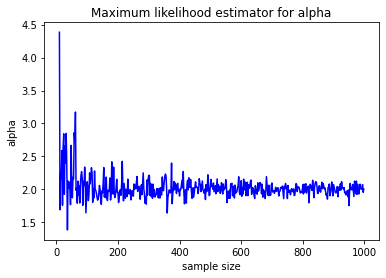

In [18]:
plt.plot(list(mle_result.keys()), list(mle_result.values()), 'b-')
plt.title("Maximum likelihood estimator for alpha")
plt.xlabel("sample size")
plt.ylabel("alpha")

In [19]:
mome_result = {}
for key, val in result.items():
    mome_result[key] = print_res(val, False)

Text(0, 0.5, 'alpha')

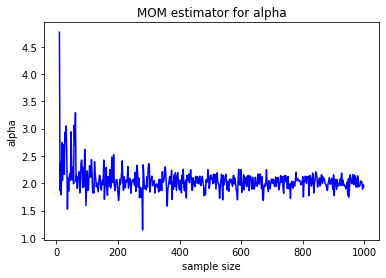

In [20]:
plt.plot(list(mome_result.keys()), list(mome_result.values()), 'b-')
plt.title("MOM estimator for alpha")
plt.xlabel("sample size")
plt.ylabel("alpha")